###### Assessment

###### I am going to provide two .csv files , you are supposed to work on them and have to provide solutions to the following problems

###### import necessary libraries

In [70]:
import pandas as pd
d1 = pd.read_csv("/content/college_1.csv")
d2 = pd.read_csv("/content/college_2.csv")
d2.head()

,Name,python,python_en,mysql,computational_thinking,Previous Geekions,CodeKata Score,Department,Rising
0,ASHOK KUMAR K,100,0,31,9,19400,19400,Electronics and Electrical Engineering,0
1,Chandru,0,20,0,0,14150,14490,Computer Science and Engineering,340
2,Ganesh Ramkumar R,-1,55,24,6,8790,10790,Computer Science and Engineering,2000
3,Bodipudi Harini,-1,0,35,-1,10040,10040,Electronics and Communication Engineering,0
4,VIINU V P,-1,100,24,-1,9150,9150,Electronics and Electrical Engineering,0


###### merge those two csv files (after getting as dataframes, get them as a single dataframe)

In [71]:
data1 = pd.DataFrame(d1)
data2 =  pd.DataFrame(d2)
data2=data2.astype({"python":'float',"mysql":'float'})
data=pd.concat([data1,data2])
data.tail()

,Name,python,mysql,Previous Geekions,CodeKata Score,Department,Rising,python_en,computational_thinking
30,praveen raj j,24.0,0.0,2380,2380,Computer Science and Engineering,0,-1.0,0.0
31,AMARNATH D,-1.0,12.0,1890,1890,Electronics and Communication Engineering,0,52.0,-1.0
32,bala,32.0,0.0,1720,1720,Electronics and Communication Engineering,0,49.0,-1.0
33,XY Z,-1.0,-1.0,0,0,Computer Science and Engineering,0,20.0,-1.0
34,Hariharan,-1.0,-1.0,0,0,Computer Science and Engineering,0,-1.0,0.0


###### Take each csv file , split that csv file into multiple categories (example csv files are added in the repo) 


###### consider if the codekata score exceeds 15000 points(present week) then make a csv on those observations as Exceeded expectations.csv


###### if  10000<codekata score<15000   (Reached_expectations.csv)



###### if  7000<codekata score<10000   (Needs_Improvement.csv)


###### if  codekate score < 7000        (Unsatisfactory.csv)

In [72]:
df=data.loc[data['CodeKata Score']>15000]
df.to_csv('Exceeded expectations.csv')

In [73]:
df1 = data.loc[(data['CodeKata Score']>10000) & (data['CodeKata Score']<15000)]
df1.to_csv("Reached_expectations.csv")

In [74]:
df2 = data.loc[(data['CodeKata Score']>7000) & (data['CodeKata Score']<10000)]
df2.to_csv("Needs_improvement.csv")

In [75]:
df3 =  data.loc[data['CodeKata Score']<7000]
df3.to_csv("Unsatisfactory.csv")

###### Average of previous week geekions vs this week geekions (i.e Previous Geekions vs CodeKata Score)

In [76]:

d=data.groupby(['Name'])['Previous Geekions','CodeKata Score'].sum()
dat=pd.DataFrame(d[['Previous Geekions',"CodeKata Score"]].mean(axis=1))
dat

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,0
Name,
Poojitha Y,8090.0
A.Dharani,24500.0
ABIRAMI.S,1580.0
AMARNATH D,1890.0
ASHOK KUMAR K,19400.0
...,...
vignesh,1740.0
vignesh B,120.0
vijayakumar,1580.0


###### No of students participated 

In [77]:
print("No of Students Participated: ",data['Name'].nunique())

No of Students Participated:  119


###### #Average completion of python course or my_sql or python english or computational thinking

In [78]:
py=data['python'].mean()
print("python" ,py)
py_en=data['python_en'].mean()
print("python english",py_en)
c = data['computational_thinking'].mean()
print("computational thinking",c)
m =  data['mysql'].mean()
print("mysql",m)

python 54.35294117647059
python english 29.65714285714286
computational thinking 2.2
mysql 23.5


###### rising star of the week (top 3 candidate who performed well in that particular week)

In [79]:
data.sort_values(by=['CodeKata Score'])
data.head(3)

,Name,python,mysql,Previous Geekions,CodeKata Score,Department,Rising,python_en,computational_thinking
0,A.Dharani,82.0,20.0,24500,24500,Computer Science and Engineering,0,NaN,NaN
1,V.JEEVITHA,82.0,20.0,21740,21740,Computer Science and Engineering,0,NaN,NaN
2,HEMAVATHI.R,100.0,100.0,19680,19680,Computer Science and Engineering,0,NaN,NaN


###### Shining stars of the week (top 3 candidates who has highest geekions)

In [80]:
data.sort_values(by=['Previous Geekions'])
data.head(3)

,Name,python,mysql,Previous Geekions,CodeKata Score,Department,Rising,python_en,computational_thinking
0,A.Dharani,82.0,20.0,24500,24500,Computer Science and Engineering,0,NaN,NaN
1,V.JEEVITHA,82.0,20.0,21740,21740,Computer Science and Engineering,0,NaN,NaN
2,HEMAVATHI.R,100.0,100.0,19680,19680,Computer Science and Engineering,0,NaN,NaN


###### Department wise codekata performence (pie chart)

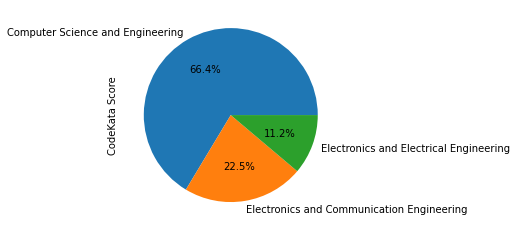

In [81]:
performance =data.groupby(['Department'])["CodeKata Score"].sum()
performance.plot.pie(autopct="%.1f%%")


###### Department wise toppers (horizantal bar graph or any visual representations of your choice)

In [82]:
import plotly.express as ps
d=data.groupby(['Department'])["Name","Department","CodeKata Score"].max()

fig = ps.bar(d, y="Name", x="CodeKata Score", color='Department', orientation='h',title='Dept wise toppers')
fig.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.

